# Exponentially weighted averages
---
***Author: Piotr Skalski***

## Imports

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from pandas_datareader import data

## Settings

In [5]:
# We will play around value of the Apple shares
company_name = 'AAPL'
# We are interested in data from the following period 
start_date = '2017-10-31'
end_date = '2018-10-31'

## Plotting functions

In [34]:
def make_graph(data_y, x, labels, colors, plot_name, file_name=None):
    plt.figure(figsize=(16,12))
    plt.style.use('dark_background')
    
    for series, color in zip(data_y, colors):
        plt.plot(x[:len(series)], series, color, lw=2)

    plt.title(plot_name, fontsize=30)
    plt.ylabel('stock close value', fontsize=15)
    plt.xlabel('date', fontsize=15)
    plt.legend(labels, loc='lower right', prop={'size': 15}, framealpha=0.0)
    
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.box(False)

    if(file_name):
        plt.savefig(file_name)
        plt.close()

## Data loading

In [7]:
panel_data = data.DataReader(company_name, 'yahoo', start_date, end_date)

In [8]:
panel_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-31,169.649994,166.940002,167.899994,169.039993,36046800.0,165.943161
2017-11-01,169.940002,165.610001,169.869995,166.889999,33637800.0,163.832565
2017-11-02,168.500000,165.279999,166.600006,168.110001,41393400.0,165.030197
2017-11-03,174.259995,171.119995,174.000000,172.500000,59398600.0,169.339783
2017-11-06,174.990005,171.720001,172.369995,174.250000,35026300.0,171.057724


In [27]:
# Extraction of key values
close_data = panel_data["Close"].tolist()
index = panel_data.index.tolist()

## Visualization of the dataset

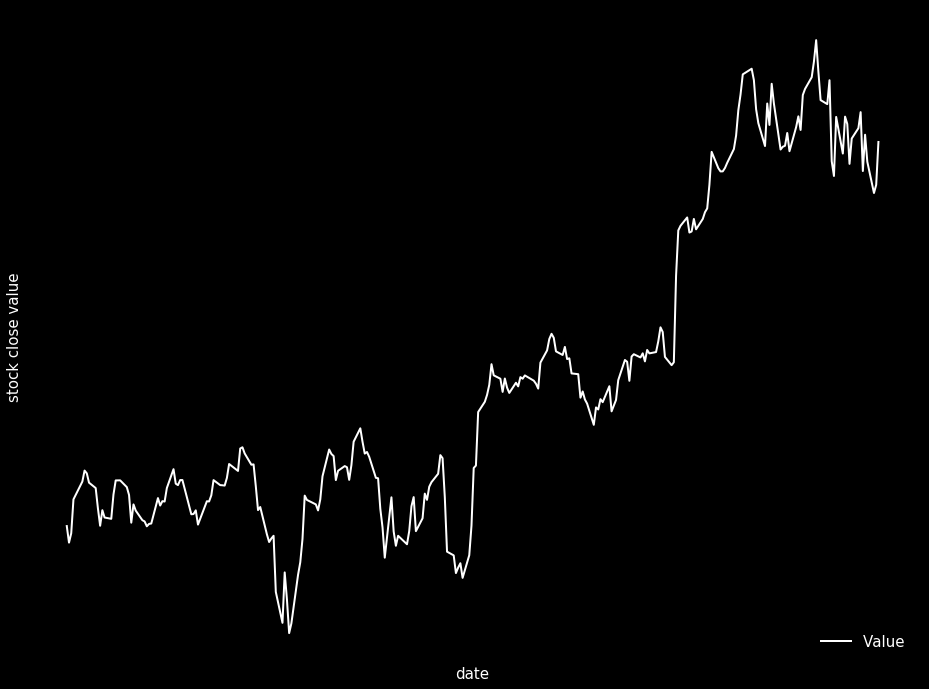

In [35]:
make_graph([close_data], index, ["Value"], ["#FFFFFF"], "")

## Exponentially weighted averages

In [29]:
def exp_weighted_average(data, beta):
    weighted_average_values = []
    for value in data:
        if len(weighted_average_values) is 0:
            weighted_average_values.append(value)
        else:
            next_value = beta * weighted_average_values[-1] + (1 - beta) * value
            weighted_average_values.append(next_value)
    return weighted_average_values

In [30]:
ewa_98 = exp_weighted_average(close_data, 0.98)
ewa_95 = exp_weighted_average(close_data, 0.95)
ewa_90 = exp_weighted_average(close_data, 0.90)
ewa_80 = exp_weighted_average(close_data, 0.80)

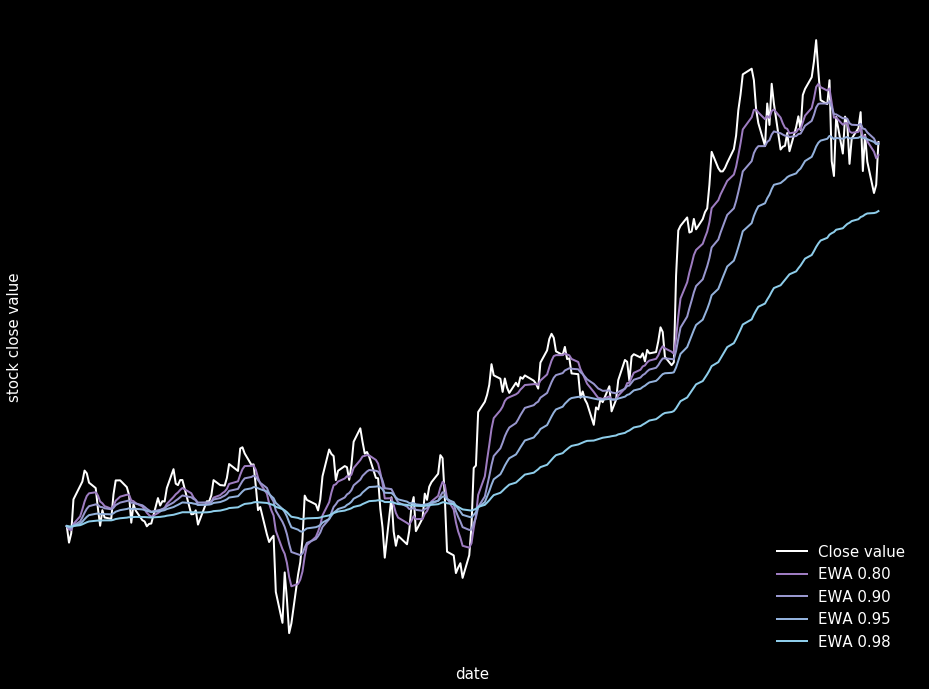

In [36]:
data = [
    close_data, 
    ewa_80, 
    ewa_90, 
    ewa_95, 
    ewa_98
]
labels = [
    "Close value", 
    "EWA 0.80", 
    "EWA 0.90", 
    "EWA 0.95", 
    "EWA 0.98"
]
colors = [
    "#FFFFFF", 
    "#9E7CC1", 
    "#9897CE", 
    "#93B2DC", 
    "#8ECDEA"
]

make_graph(data, index, labels, colors, "")

## Animation

### Settings

In [23]:
OUTPUT_DIR = "ewa_visualisations"
ANIMATION_SHIFT = 20

### Support functions

In [24]:
def cut_list(array, iteration, shift):
    if iteration < shift:
        return [];
    elif iteration - shift < len(array):
        return array[:(iteration - shift)]
    else:
        return array

In [37]:
labels = [
    "Close value", 
    "EWA 0.80", 
    "EWA 0.90", 
    "EWA 0.95", 
    "EWA 0.98"
]
colors = [
    "#FFFFFF", 
    "#9E7CC1", 
    "#9897CE", 
    "#93B2DC", 
    "#8ECDEA"
]

for i in range(len(close_data) + 3 * ANIMATION_SHIFT):
    file_name = "EWA_{:05}.png".format(i)
    output_file = os.path.join(OUTPUT_DIR, file_name)
    data = [
        close_data,
        cut_list(ewa_80, i, 0 * ANIMATION_SHIFT),
        cut_list(ewa_90, i, 1 * ANIMATION_SHIFT),
        cut_list(ewa_95, i, 2 * ANIMATION_SHIFT),
        cut_list(ewa_98, i, 3 * ANIMATION_SHIFT)
    ]
    
    make_graph(data, index, labels, colors, "", output_file)